# HW5 Data Preparation

In [282]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os
from glob import glob
import matplotlib.pylab as plt
%matplotlib inline

reference: http://www.degeneratestate.org/posts/2016/Oct/23/image-processing-with-numpy/

In [8]:
print(os.listdir("IDC_regular_ps50_idx5"))

['9036', '10268', '10257', '8913', '13613', '8914', '15510', '10259', '16165', '10292', '12951', '10261', '10295', '9259', '12750', '13020', '16552', '12905', '9266', '16555', '13018', '9261', '9257', '12934', '12933', '9250', '10260', '10258', '10293', '9037', '10269', '16531', '10256', '15516', '12932', '12935', '9256', '16554', '9260', '13019', '16553', '13021', '8984', '9258', '12751', '9267', '12876', '12882', '15634', '12871', '14188', '15633', '9324', '12878', '.DS_Store', '9323', '9383', '8867', '9346', '9174', '12822', '9173', '9322', '9325', '12879', '14189', '12870', '12884', '12241', '15632', '12883', '12877', '9126', '13106', '12823', '13591', '9175', '12824', '9347', '9181', '9382', '10307', '13916', '10300', '14306', '15471', '16896', '14156', '9135', '12890', '12897', '10308', '10301', '10306', '12896', '14157', '12891', '12898', '14192', '13458', '9083', '9077', '13460', '8955', '12910', '9041', '14210', '14082', '10274', '9227', '10273', '13402', '14078', '9023', '129

In [20]:
Data = glob('IDC_regular_ps50_idx5/**/*.png', recursive=True) 

In [23]:
len(Data)

277524

In [27]:
pwd

'/Users/zechen/Desktop/AML/Homework/HW5'

In [46]:
import cv2
import glob
import numpy as np

In [71]:
folder_lst = os.listdir("IDC_regular_ps50_idx5")

In [73]:
train = []
train_labels = []

In [181]:
image_train  =  np.ndarray((277524, 50, 50,3),dtype = np.uint8)
image_train.shape

(277524, 50, 50, 3)

In [62]:
img = cv2.imread('IDC_regular_ps50_idx5/9036/0/9036_idx5_x2151_y1301_class0.png')

In [ ]:
files = glob.glob ("/data/train/class1/*.png") # your image path
for myFile in files:
    image = cv2.imread (myFile)
    train.append (image)
    train_labels.append([1., 0.])

In [198]:
folder_lst = os.listdir("IDC_regular_ps50_idx5")
image_train  =  np.ndarray((277524, 50, 50,3),dtype = np.uint8)
train = []
train_labels = []
i=0
for item in folder_lst:
    path = "IDC_regular_ps50_idx5/*"+item+"/1/*.png"
    files = glob.glob(path) # your image path
    for myFile in files:
        image = cv2.imread(myFile)
        #print(type(train))
        #print(train)
        image_train[i] = cv2.resize(image,(50,50))
        train_labels.append([1., 0.])
        i+=1
    
    path2 = "IDC_regular_ps50_idx5/*"+item+"/0/*.png"
    files2 = glob.glob(path2)
    for myFile2 in files2:
        image2 = cv2.imread(myFile2)
        image_train[i] = cv2.resize(image2,(50,50))
        train_labels.append([0., 1.])
        i+=1
    

In [207]:
train_labels = np.array(train_labels)
np.save('train',train)
np.save('train_labels',train_labels)
np.save('image_train',image_train)

In [304]:
image_train = np.load('image_train.npy')
train_labels = np.load('train_labels.npy')

In [326]:
X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(image_train,train_labels, test_size = 0.78)

In [327]:
X_train_sub.shape

(61055, 50, 50, 3)

In [328]:
X_test_sub.shape

(216469, 50, 50, 3)

In [329]:
np.save('X_train_sub',X_train_sub)
np.save('y_train_sub',y_train_sub)

Plot numpy array to image to double check

In [261]:
def plti(im, h=8, **kwargs):
    """
    Helper function to plot an image.
    """
    y = im.shape[0]
    x = im.shape[1]
    w = (y/x) * h
    plt.figure(figsize=(w,h))
    plt.imshow(im, interpolation="none", **kwargs)
    plt.axis('off')


In [260]:
im = plt.imread("IDC_regular_ps50_idx5/9036/0/9036_idx5_x2151_y1301_class0.png")
im

array([[[0.9607843 , 0.9372549 , 0.9529412 ],
        [0.93333334, 0.88235295, 0.9137255 ],
        [0.81960785, 0.6313726 , 0.74509805],
        ...,
        [0.8980392 , 0.8117647 , 0.88235295],
        [0.91764706, 0.8392157 , 0.88235295],
        [0.9137255 , 0.8235294 , 0.8862745 ]],

       [[0.95686275, 0.9411765 , 0.9529412 ],
        [0.9490196 , 0.92941177, 0.9529412 ],
        [0.87058824, 0.7607843 , 0.8235294 ],
        ...,
        [0.9647059 , 0.9372549 , 0.9411765 ],
        [0.9372549 , 0.8745098 , 0.92156863],
        [0.84313726, 0.654902  , 0.7490196 ]],

       [[0.9647059 , 0.94509804, 0.9607843 ],
        [0.92941177, 0.8862745 , 0.9098039 ],
        [0.8980392 , 0.8039216 , 0.87058824],
        ...,
        [0.8627451 , 0.70980394, 0.8039216 ],
        [0.8235294 , 0.64705884, 0.76862746],
        [0.79607844, 0.61960787, 0.73333335]],

       ...,

       [[0.73333335, 0.50980395, 0.64705884],
        [0.8156863 , 0.5686275 , 0.7058824 ],
        [0.7921569 , 0

In [161]:
train.shape

(277524,)

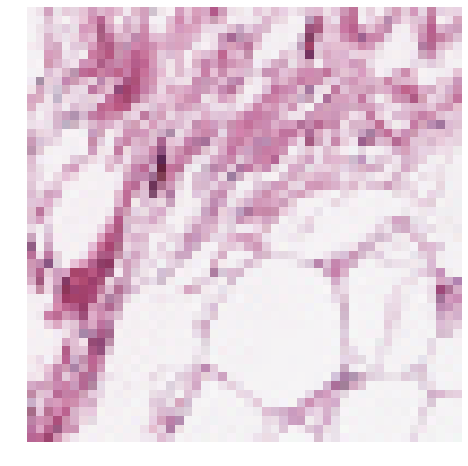

In [262]:
plti(im)